In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
data = gpd.read_file(r'./data/final_remedial_plan/final_remedial_plan.shp')

In [3]:
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
OBJECTID      100 non-null int64
District_N    100 non-null object
District_1    100 non-null int64
SHAPE_Leng    100 non-null float64
SHAPE_Area    100 non-null float64
geometry      100 non-null geometry
dtypes: float64(2), geometry(1), int64(2), object(1)
memory usage: 4.8+ KB


In [4]:
data.head()

,OBJECTID,District_N,District_1,SHAPE_Leng,SHAPE_Area,geometry
0,1,1,1,3.850342,0.324856,"POLYGON ((-82.53303 37.11062, -82.53267 37.110..."
1,2,2,2,1.511380,0.033181,"POLYGON ((-77.22643 38.63042, -77.22720 38.626..."
2,3,3,3,4.839454,0.382765,"POLYGON ((-81.96708 37.53292, -81.96694 37.532..."
3,4,4,4,4.337903,0.292338,"POLYGON ((-82.12191 36.64611, -82.12245 36.646..."
4,5,5,5,4.470815,0.241680,"MULTIPOLYGON (((-82.12191 36.64611, -82.12289 ..."


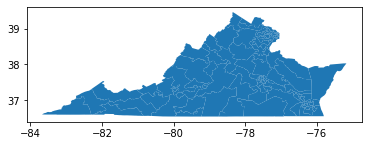

In [5]:
data.plot()

In [6]:
data.crs

{'init': 'epsg:4269'}

In [7]:
data['geometry'].head()

0    POLYGON ((-82.53303 37.11062, -82.53267 37.110...
1    POLYGON ((-77.22643 38.63042, -77.22720 38.626...
2    POLYGON ((-81.96708 37.53292, -81.96694 37.532...
3    POLYGON ((-82.12191 36.64611, -82.12245 36.646...
4    MULTIPOLYGON (((-82.12191 36.64611, -82.12289 ...
Name: geometry, dtype: geometry

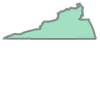

In [8]:
data['geometry'][0]

In [9]:
for index, row in data[0:5].iterrows():
    poly_area = row['geometry'].area
    print('Polygon area at index {0} is: {1:3f}'.format(index, poly_area))

Polygon area at index 0 is: 0.324856
Polygon area at index 1 is: 0.033181
Polygon area at index 2 is: 0.382765
Polygon area at index 3 is: 0.292338
Polygon area at index 4 is: 0.241680


In [10]:
data['geometry'][0].area

0.3248555828050002

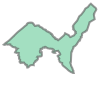

In [11]:
data['geometry'][1]

In [12]:
data['geometry'][1].area

0.03318105451499983

In [13]:
data['area'] = data['geometry'].apply(lambda x: x.area)

In [14]:
data['area'].head()

0    0.324856
1    0.033181
2    0.382765
3    0.292338
4    0.241680
Name: area, dtype: float64

### Maximum Area

In [15]:
data['area'].max()

0.5694939768399986

In [16]:
data.loc[data['area'].idxmax()]

OBJECTID                                                    100
District_N                                                  100
District_1                                                  100
SHAPE_Leng                                               4.3754
SHAPE_Area                                             0.569494
geometry      POLYGON ((-75.17707799999992 38.01342000000006...
area                                                   0.569494
Name: 99, dtype: object

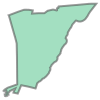

In [17]:
data['geometry'][data['area'].idxmax()]

### Minimum Area

In [18]:
data['area'].min()

0.0017213744309998826

In [19]:
data.loc[data['area'].idxmin()]

OBJECTID                                                     49
District_N                                                   49
District_1                                                   49
SHAPE_Leng                                             0.375273
SHAPE_Area                                           0.00172137
geometry      POLYGON ((-77.14712999999992 38.87360600000006...
area                                                 0.00172137
Name: 48, dtype: object

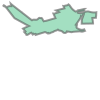

In [20]:
data['geometry'][data['area'].idxmin()]

### Mean Area

In [21]:
data['area'].mean()

0.11290959530311998

## Intersect

In [22]:
from shapely.geometry import LineString, MultiLineString

In [23]:
line_a = LineString([(0,0), (1,1)])
line_b = LineString([(1,1), (0,2)])

In [24]:
line_a.intersects(line_b)

True

In [25]:
line_a.touches(line_b)

True

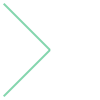

In [26]:
MultiLineString([line_a, line_b])

In [27]:
# line does intersect with itself
line_a.intersects(line_a)

True

In [28]:
# line does not touch itself
line_a.touches(line_a)

False

### VA Intersects / Touches

In [29]:
# does district 1 intersect district 2?
data['geometry'][0].intersects(data['geometry'][1])

False

In [30]:
# does district 1 touch district 2?
data['geometry'][0].touches(data['geometry'][1])

False

In [31]:
# District_N is not the same as District 1
any(data['District_1'] == data['District_N'])

False

In [32]:
# ObjectID is the not same as District_N
any(data['OBJECTID'] == data['District_N'])

False

In [33]:
data['OBJECTID'].values == data['District_N'].values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [34]:
data.OBJECTID.values

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

In [35]:
# District_N values are strings
data.District_N.values

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100'],
      dtype=object)

In [36]:
data.District_1.values

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

In [37]:
# District_1  not the same as OBJECTID
all(data['District_1'] == data['OBJECTID'])

True

In [38]:
data.geometry.intersects(data.geometry)

0     True
1     True
2     True
3     True
4     True
      ... 
95    True
96    True
97    True
98    True
99    True
Length: 100, dtype: bool

In [39]:
data.geometry.touches(data.geometry)

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

### Intersect with District 1

In [40]:
intersects_d1 = data['geometry'].intersects(data['geometry'][0])
intersects_d1

0      True
1     False
2     False
3      True
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [41]:
data[intersects_d1]

,OBJECTID,District_N,District_1,SHAPE_Leng,SHAPE_Area,geometry,area
0,1,1,1,3.850342,0.324856,"POLYGON ((-82.53303 37.11062, -82.53267 37.110...",0.324856
3,4,4,4,4.337903,0.292338,"POLYGON ((-82.12191 36.64611, -82.12245 36.646...",0.292338


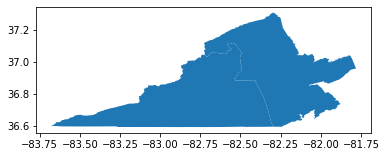

In [42]:
data[intersects_d1].plot()

### Touces District 1

In [43]:
touches_d1 = data['geometry'].touches(data['geometry'][0])
touches_d1

0     False
1     False
2     False
3      True
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [44]:
data[touches_d1]

,OBJECTID,District_N,District_1,SHAPE_Leng,SHAPE_Area,geometry,area
3,4,4,4,4.337903,0.292338,"POLYGON ((-82.12191 36.64611, -82.12245 36.646...",0.292338


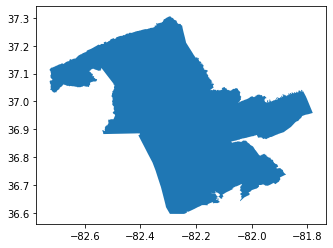

In [45]:
data[touches_d1].plot()

# ZCTA Data

In [46]:
zcta =  gpd.read_file(r'./data/tl_2019_us_zcta510/tl_2019_us_zcta510.shp')

In [47]:
zcta.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33144 entries, 0 to 33143
Data columns (total 10 columns):
ZCTA5CE10     33144 non-null object
GEOID10       33144 non-null object
CLASSFP10     33144 non-null object
MTFCC10       33144 non-null object
FUNCSTAT10    33144 non-null object
ALAND10       33144 non-null int64
AWATER10      33144 non-null int64
INTPTLAT10    33144 non-null object
INTPTLON10    33144 non-null object
geometry      33144 non-null geometry
dtypes: geometry(1), int64(2), object(7)
memory usage: 2.5+ MB


In [48]:
zcta.head()

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,43451,43451,B5,G6350,S,63484186,157689,+41.3183010,-083.6174935,"POLYGON ((-83.70873 41.32733, -83.70815 41.327..."
1,43452,43452,B5,G6350,S,121522304,13721730,+41.5157923,-082.9809454,"POLYGON ((-83.08698 41.53780, -83.08256 41.537..."
2,43456,43456,B5,G6350,S,9320975,1003775,+41.6318300,-082.8393923,"MULTIPOLYGON (((-82.83558 41.71082, -82.83515 ..."
3,43457,43457,B5,G6350,S,48004681,0,+41.2673301,-083.4274872,"POLYGON ((-83.49650 41.25371, -83.48382 41.253..."
4,43458,43458,B5,G6350,S,2573816,39915,+41.5304461,-083.2133648,"POLYGON ((-83.22229 41.53102, -83.22228 41.532..."


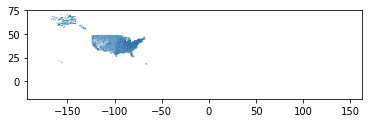

In [49]:
zcta.plot()

In [50]:
zcta.crs

{'init': 'epsg:4269'}

In [51]:
zcta.crs == data.crs

True

Text(0.5, 0.98, 'Virginia')

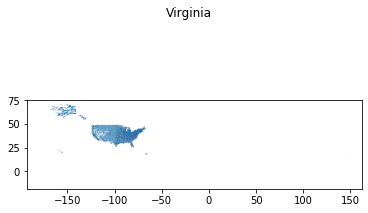

In [52]:
ax = zcta.plot()
data.plot(ax=ax, color='red', alpha=.2)
plt.suptitle('Virginia')

In [53]:
intersects_d1 = zcta['geometry'].intersects(data['geometry'][0])
any(intersects_d1)

True

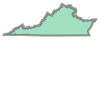

In [54]:
va = data['geometry'].unary_union
va

In [55]:
va_zips = zcta[zcta['geometry'].intersects(va)].copy()

In [56]:
va_zips.head()

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
221,27030,27030,B5,G6350,S,441866998,2813713,+36.4898143,-080.6292139,"POLYGON ((-80.84965 36.47917, -80.84781 36.479..."
227,27046,27046,B5,G6350,S,105528892,336500,+36.5022187,-080.0782643,"POLYGON ((-80.16711 36.45124, -80.16586 36.451..."
229,27048,27048,B5,G6350,S,214926306,1080501,+36.4825144,-079.9176781,"POLYGON ((-80.02829 36.50758, -80.02829 36.507..."
233,27053,27053,B5,G6350,S,175075272,1008523,+36.4742760,-080.3478503,"POLYGON ((-80.48962 36.48806, -80.48130 36.488..."
507,27288,27288,B5,G6350,S,175397080,2106700,+36.4976449,-079.7500154,"POLYGON ((-79.86646 36.54170, -79.86572 36.542..."


Text(0.5, 0.98, 'Virginia Zipcodes')

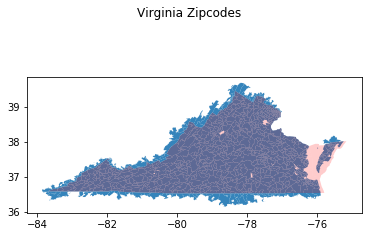

In [57]:
ax = va_zips.plot(alpha=0.9)
data.plot(ax=ax, color='red', alpha=0.2)
plt.suptitle('Virginia Zipcodes')

In [58]:
va_zips['ZCTA5CE10'].values

array(['27030', '27046', '27048', ..., '23061', '23608', '26711'],
      dtype=object)

In [59]:
all(va_zips['ZCTA5CE10'].value_counts() == 1)

True

In [60]:
any(va_zips['ZCTA5CE10'].str.endswith('X'))

False

## Get list of zips that intersect with each district

### zips that intersect the first district

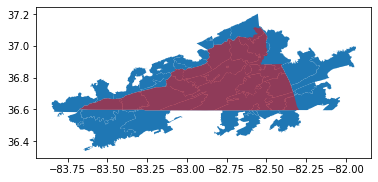

In [61]:
ax = zcta[zcta['geometry'].intersects(data.loc[0, 'geometry'])].plot()
data['geometry'][[0]].plot(ax=ax, color='red', alpha=0.5)

In [62]:
list(zcta.loc[zcta['geometry'].intersects(data.loc[0, 'geometry']), 'ZCTA5CE10'])

['37724',
 '37752',
 '37869',
 '37617',
 '37642',
 '37660',
 '37665',
 '37879',
 '24202',
 '24216',
 '24219',
 '24221',
 '24224',
 '24230',
 '24243',
 '24244',
 '24245',
 '24246',
 '24248',
 '24250',
 '24251',
 '24258',
 '24263',
 '24265',
 '24266',
 '24270',
 '24271',
 '24273',
 '24277',
 '24279',
 '24281',
 '24282',
 '24290',
 '24293',
 '40815',
 '40820',
 '40826',
 '40828',
 '40831',
 '40843',
 '40855',
 '40856',
 '40862',
 '40927',
 '40965']

In [63]:
va_zips.iloc[0]

ZCTA5CE10                                                 27030
GEOID10                                                   27030
CLASSFP10                                                    B5
MTFCC10                                                   G6350
FUNCSTAT10                                                    S
ALAND10                                               441866998
AWATER10                                                2813713
INTPTLAT10                                          +36.4898143
INTPTLON10                                         -080.6292139
geometry      POLYGON ((-80.849654 36.479169, -80.847807 36....
Name: 221, dtype: object

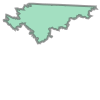

In [64]:
va_zips['geometry'][221]

In [65]:
any(data['geometry'].intersects(va_zips['geometry'][221]))

True

In [66]:
data[data['geometry'].intersects(va_zips['geometry'][221])]

,OBJECTID,District_N,District_1,SHAPE_Leng,SHAPE_Area,geometry,area
5,6,6,6,4.107482,0.332070,"POLYGON ((-80.91267 37.07335, -80.91215 37.072...",0.332070
8,9,9,9,4.133860,0.318112,"POLYGON ((-80.02609 37.17278, -80.02270 37.170...",0.318112


In [67]:
list(data['District_N'][data['geometry'].intersects(va_zips['geometry'][221])])

['6', '9']

In [68]:
data['geometry'].intersects(va_zips['geometry'][221])

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [69]:
def get_zipcode_list(x):
    return list(data.loc[ data.loc[:,'geometry'].intersects(x), 'District_N' ])

In [70]:
va_zips['district_list'] = va_zips['geometry'].apply(get_zipcode_list)

In [71]:
va_zips['district_list']

221                [6, 9]
227                   [9]
229               [9, 14]
233                   [9]
507                  [14]
               ...       
32690                [34]
32802    [56, 72, 73, 74]
32808            [96, 98]
32996            [93, 94]
33104                [29]
Name: district_list, Length: 1035, dtype: object

### Next Steps

- Get CFPB data
- Create merging from previous code